In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
methods =  ['lr', 'dhtv', 'nn2', 'nn6', 'rbf']
n = 30


for data in ['powerplant', 'ale', 'housing', 'autompg']:
    print('--------------------------------------------' + data + '--------------------------------------------')
    for method in methods: 

        if data != 'ale' and method == 'dhtv_irr':
            continue

        print('-----------------------------' + method + '--------------------------')
        folder = 'comp_results/' + data + '_' + method

        test_mses_all = np.loadtxt(folder + '/test_mse70.txt').reshape(n, -1)
        valid_mses_all = np.loadtxt(folder + '/valid_mse70.txt').reshape(n, -1)
        train_mses_all = np.loadtxt(folder + '/train_mse70.txt').reshape(n, -1)
        htv_all = np.loadtxt(folder + '/htv70.txt').reshape(n, -1)
        sparsity_all = np.loadtxt(folder + '/sparsity70.txt').reshape(n, -1)

        htv_dhtv_all = np.loadtxt('comp_results/' + data + '_dhtv'  + '/htv70.txt').reshape(n, -1)
        htv_base = np.mean(htv_dhtv_all[:, 0])
        valid_mses_all = np.nan_to_num(valid_mses_all, nan=np.inf)
        
        if method == 'dhtv' or method == 'dhtv_irr':
            lip_ex_all = np.loadtxt(folder + '/lip_exact70.txt').reshape(n, -1)

        best_lmbdas_idx = np.argmin(valid_mses_all, axis=1)
        
        print('average best train mse:', np.round(np.mean(train_mses_all[range(n), best_lmbdas_idx]),5), np.round(np.std(train_mses_all[range(n), best_lmbdas_idx]),5))
        print('average best valid mse:', np.round(np.mean(valid_mses_all[range(n), best_lmbdas_idx]),5), np.round(np.std(valid_mses_all[range(n), best_lmbdas_idx]),5))
        print('average best test mse:', np.round(np.mean(test_mses_all[range(n), best_lmbdas_idx]),5), np.round(np.std(test_mses_all[range(n), best_lmbdas_idx]),5))
        print('average best htv:', np.round(np.mean(htv_all[range(n), best_lmbdas_idx] / htv_base),2), np.round(np.std(htv_all[range(n), best_lmbdas_idx] / htv_base),2))
        print('average best sparsity:', np.round(np.mean(sparsity_all[range(n), best_lmbdas_idx]),5), np.round(np.std(sparsity_all[range(n), best_lmbdas_idx]),5))
        if method == 'dhtv' or method == 'dhtv_irr':
            print('average best lip exact:', np.round(np.mean(lip_ex_all[range(n), best_lmbdas_idx]),5), np.round(np.std(lip_ex_all[range(n), best_lmbdas_idx]),5))

--------------------------------------------powerplant--------------------------------------------
-----------------------------lr--------------------------
average best train mse: 20.8176 0.31846
average best valid mse: 20.84284 1.21074
average best test mse: 20.48379 1.12395
average best htv: 0.0 0.0
average best sparsity: 1.0 0.0
-----------------------------dhtv--------------------------
average best train mse: 1.33772 0.76848
average best valid mse: 12.82482 1.24324
average best test mse: 12.33409 1.17081
average best htv: 0.82 0.06
average best sparsity: 0.48405 0.03058
average best lip exact: 452.5615 192.74934
-----------------------------nn2--------------------------
average best train mse: 9.49712 0.87569
average best valid mse: 13.57081 1.24397
average best test mse: 13.22504 1.12395
average best htv: 1.85 0.51
average best sparsity: 0.36226 0.04631
-----------------------------nn6--------------------------
average best train mse: 6.88276 1.79756
average best valid mse: 13.4

-----------------------------dhtv-powerplant--------------------------


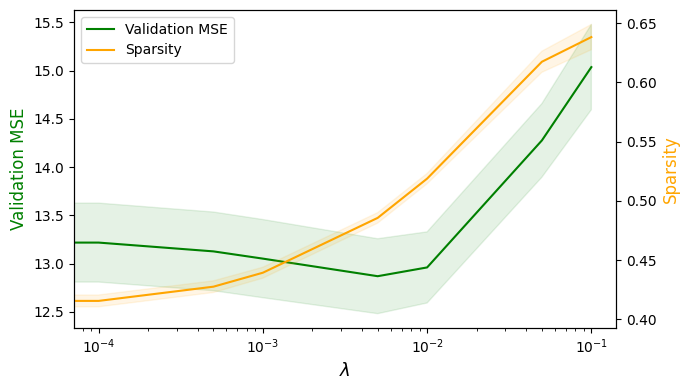

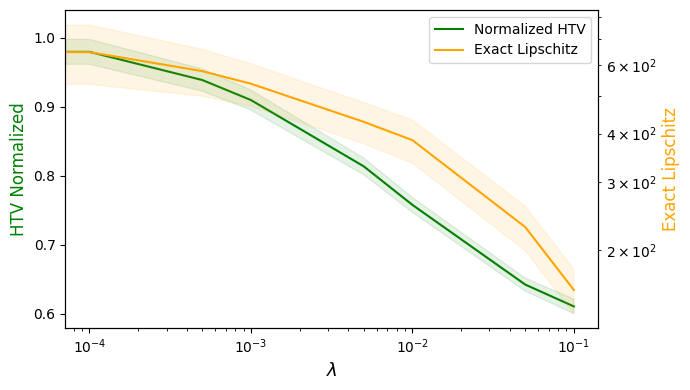

In [4]:
methods = ['dhtv']
data = 'powerplant'
n = 30

for method in methods: 
    print('-----------------------------' + method +  '-' + data + '--------------------------')
    folder = 'comp_results/' + data + '_' + method

    test_mses_all = np.loadtxt(folder + '/test_mse70.txt').reshape(n, -1)
    valid_mses_all = np.loadtxt(folder + '/valid_mse70.txt').reshape(n, -1)
    train_mses_all = np.loadtxt(folder + '/train_mse70.txt').reshape(n, -1)
    htv_all = np.loadtxt(folder + '/htv70.txt').reshape(n, -1)
    sparsity_all = np.loadtxt(folder + '/sparsity70.txt').reshape(n, -1)

    

    if method == 'dhtv':
        lip_exact_all = np.loadtxt(folder + '/lip_exact70.txt').reshape(n, -1)
    elif method != 'rbf':
        lip_all = np.loadtxt(folder + '/lip70.txt').reshape(n, -1)

    valid_mses_all = np.nan_to_num(valid_mses_all, nan=np.inf)

    hyps = [0, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]

    htv_dhtv_all = np.loadtxt('comp_results/' + data + '_dhtv'  + '/htv70.txt').reshape(n, -1)
    htv_base = np.mean(htv_dhtv_all[:, 0])

    v = np.mean(valid_mses_all, axis=0)
    vs = 1.65* np.std(valid_mses_all, axis=0)/ np.sqrt(n)
    plt.figure(figsize=(7, 4))
    ax1 = plt.subplot()
    l1, =ax1.plot(hyps, v, label='Validation MSE', c='green') 
    ax1.fill_between(hyps, (v-vs), (v+vs), color='green', alpha=.1)
    ax1.set_xscale('log')
    ax1.set_ylabel('Validation MSE', fontsize=12, color='green')

    v = np.mean(sparsity_all, axis=0)
    vs = 1.65 * np.std(sparsity_all, axis=0) / np.sqrt(n)
    ax2 = ax1.twinx()
    l2, = ax2.plot(hyps, v, label='Sparsity', c='orange')   
    ax2.fill_between(hyps, (v-vs), (v+vs), color='orange', alpha=.1)
    ax2.set_xscale('log')
    ax2.set_ylabel('Sparsity', fontsize=12, color='orange')
    
    ax1.set_xlabel('$\lambda$', fontsize = 13)
    plt.legend([l1, l2], ['Validation MSE', 'Sparsity'])
    plt.tight_layout()
    plt.savefig('comp_results/pp-vmsesp.png')
    plt.show()

    v = np.mean(htv_all / htv_base, axis=0)
    vs = 1.65 * np.std(htv_all / htv_base, axis=0) / np.sqrt(n)
    plt.figure(figsize=(7, 4))
    ax1 = plt.subplot()
    l1, = ax1.plot(hyps, v, label='Normalized HTV', c= 'green')   
    ax1.fill_between(hyps, (v-vs), (v+vs), color='green', alpha=.1)
    ax1.set_xscale('log')
    ax1.set_ylabel('HTV Normalized', fontsize=12, color='green')
    
    if method == 'dhtv':
        v = np.mean(lip_exact_all, axis=0)
        vs =  1.65*np.std(lip_exact_all, axis=0) / np.sqrt(n)
        ax2 = ax1.twinx()
        l2, = ax2.plot(hyps, v, label='Exact Lipschitz', c = 'orange')   
        ax2.fill_between(hyps, (v-vs), (v+vs), color='orange', alpha=.1)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_ylabel('Exact Lipschitz', fontsize=12, color='orange')
    
    ax1.set_xlabel('$\lambda$', fontsize = 13)
    plt.tight_layout()
    plt.legend([l1, l2], ['Normalized HTV', 'Exact Lipschitz'])
    plt.savefig('comp_results/pp-htvlip.png')
    plt.show()
    